In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

Read in the Stars.csv dataset using pandas and create the y label vector, which will be the
Type column. The features we will be using for prediction are the columns Temperature, L,
R, and A M. Anywhere you are asked to create a train-test split on the data, you should use
a fixed random state throughout (noted in your write-up) and a test size=0.2. Use a fixed
random state for the LinearSVC classifier throughout.

In [33]:
data = pd.read_csv("Stars.csv")

y_vector = np.array(data.loc[:,'Type'])
print(y_vector)

row1 = np.array(data['Temperature'])
row2 = np.array(data['L'])
row3 = np.array(data['R'])
row4 = np.array(data['A_M'])

x_matrix = np.c_[row1,row2,row3,row4]

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5]


1. Train-test split on the data
2. Create a validation set and subtraining set from the training set (a single validation
set, rather than KFolds) with 0.125 of the training set serving as the validation set.

In [34]:
#1
X_tr, X_te, Y_tr,Y_te = train_test_split(x_matrix,y_vector,test_size=0.20,random_state = 78)

#2
X_valid, X_sub, Y_valid, Y_sub = train_test_split(X_te,Y_te, test_size=0.125,random_state = 78)


1. Fit the LinearSVC classifier on the training set and evaluate on the validation set for
all combinations of max iter=[1000, 10000, 100000, 1000000] and C=[0.01, 0.1, 1, 10,
100, 1000].

In [35]:
max_iter = [1000, 10000, 100000, 1000000] 
C = [0.01, 0.1, 1, 10, 100, 1000]
val_acc = []
for max in max_iter:
    for c in C:
        clf = LinearSVC(max_iter=max,C=c)
        clf.fit(X_sub, Y_sub)

        y_pred = clf.predict(X_valid)
        accuracy =  accuracy_score(Y_valid, y_pred)

        # accuracy = np.mean(cross_val_score(clf, X_valid, Y_valid))

        val_acc.append(accuracy)

C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear 

2. Print the validation accuracy for each combination and show a heatmap comparing of
the validation accuracies across the combinations (include a colorbar)

max_iter = 1000, c = 0.01:
Validation accuracy:  0.21428571428571427 

max_iter = 1000, c = 0.1:
Validation accuracy:  0.21428571428571427 

max_iter = 1000, c = 1:
Validation accuracy:  0.21428571428571427 

max_iter = 1000, c = 10:
Validation accuracy:  0.21428571428571427 

max_iter = 1000, c = 100:
Validation accuracy:  0.21428571428571427 

max_iter = 1000, c = 1000:
Validation accuracy:  0.2857142857142857 

max_iter = 10000, c = 0.01:
Validation accuracy:  0.21428571428571427 

max_iter = 10000, c = 0.1:
Validation accuracy:  0.2857142857142857 

max_iter = 10000, c = 1:
Validation accuracy:  0.2619047619047619 

max_iter = 10000, c = 10:
Validation accuracy:  0.3333333333333333 

max_iter = 10000, c = 100:
Validation accuracy:  0.2619047619047619 

max_iter = 10000, c = 1000:
Validation accuracy:  0.2619047619047619 

max_iter = 100000, c = 0.01:
Validation accuracy:  0.2619047619047619 

max_iter = 100000, c = 0.1:
Validation accuracy:  0.2619047619047619 

max_iter = 100000, 

Text(0, 0.5, 'max_iter')

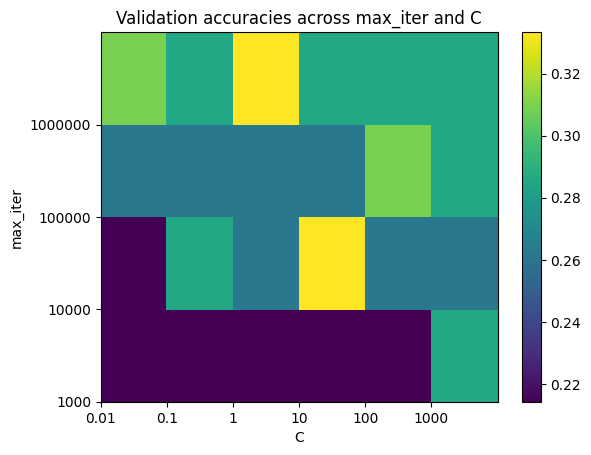

In [36]:
matrix = [[],[],[],[]]
for i in range(len(max_iter)):
    for j in range(len(C)): 
        print("max_iter = {}, c = {}:".format(max_iter[i],C[j]))
        print("Validation accuracy: ", val_acc[i*4 + j],"\n")
        matrix[i].append(val_acc[i*4 + j])

plt.pcolor(matrix)
plt.colorbar()

plt.title("Validation accuracies across max_iter and C")

plt.xticks(np.arange(len(C)), C)
plt.xlabel("C")
plt.yticks(np.arange(len(max_iter)), max_iter)
plt.ylabel("max_iter")

Question 2.2 (5 points): Use the maximum iterations and C values you found to perform
best to inform how you create your LinearSVC() and fit on the whole training set. Compute
and print the training and testing accuracy for the Stars dataset.

In [37]:
# best maximum iteratoins and C values
# max_iter = 100000, c = 1000:
# Training:  0.35714285714285715
clf = LinearSVC(max_iter=100000,C=1000)

clf.fit(X_tr,Y_tr)
y_predict = clf.predict(X_tr)
print("Training: ", accuracy_score(Y_tr, y_predict))

y_predict = clf.predict(X_te)
print("Testing: ", accuracy_score(Y_te, y_predict))

Training:  0.6145833333333334
Testing:  0.6875


C:\Users\bahou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
